In [1]:
#This code will convert realtive contributions to a weight, 
#this is a good method for comparing linear regression to machine learning.



# Create a linear regression model
## Dependent Variable
# Retail Sales: Beer, Wine, and Liquor Stores 
# Retrieve from: https://fred.stlouisfed.org/series/MRTSSM4453USN
# Shortened as "Alcohol_Sales" in the following coding.


## Independent Variables

# Consumer Price Index for All Urban Consumers: Alcoholic Beverages in U.S. City Average
# Retrieve from: https://fred.stlouisfed.org/series/CUSR0000SAF116
# Shortened as "CPI_Alcoholic_Beverages" in the following coding.

# US GDP
# Retrieve from: https://www.multpl.com/us-gdp
# Shortened as "US_GDP_Billions" in the following coding.

# US Consumer Price Index
# Retrieve from: https://www.multpl.com/cpi
# Shortened as "CPI" in the following coding.

# Real Disposable Personal Income: Per Capita
# Retrieve from: https://fred.stlouisfed.org/series/A229RX0
# Shortened as "Disposable_Personal_Income" in the following coding.

# Personal consumption expenditures: Food
# Retrieve from: https://fred.stlouisfed.org/series/CUSR0000SAF116
# Shortened as "Food_Expenditure_Billions" in the following coding.

# US Retail Sales
# Retrieve from: https://www.multpl.com/us-retail-sales
# Shortened as "US_Retail_Sales_Billions" in the following coding.

# S&P 500 Historical Prices
# Retrieve from: https://www.multpl.com/s-p-500-historical-prices
# Shortened as "SP500" in the following coding.

# US Inflation Rate
# Retrieve from: https://www.multpl.com/inflation
# Shortened as "Inflation_Rate" in the following coding.

# US Unemployment Rate
# Retrieve from: hhttps://www.multpl.com/unemployment
# Shortened as "Unemployment_Rate" in the following coding.

# S&P/Case-Shiller U.S. National Home Price Index
# Retrieve from: https://fred.stlouisfed.org/series/CSUSHPINSA
# Shortened as "Home_Price_Index" in the following coding.

# All variables were recorded on a monthly basis, spanning from January 2013 to December 2023, and encompassing a 10-year time frame.

In [2]:
# Importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd 
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [3]:
pwd

'/Users/rajeevmaharaj/Desktop'

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        120 non-null    int64  
 1   Month                       120 non-null    int64  
 2   Alcohol_Sales_Millions      120 non-null    int64  
 3   CPI_Alcoholic_Beverages     120 non-null    float64
 4   US_GDP_Billions             120 non-null    int64  
 5   CPI                         120 non-null    float64
 6   Disposable_Personal_Income  120 non-null    int64  
 7   Food_Expenditure_Billions   120 non-null    float64
 8   US_Retail_Sales_Billions    120 non-null    float64
 9   SP500                       120 non-null    float64
 10  Inflation_Rate              120 non-null    float64
 11  Unemployment_Rate           120 non-null    float64
 12  Home_Price_Index            120 non-null    float64
dtypes: float64(8), int64(5)
memory usag

In [6]:
df.head() # print Head

,Year,Month,Alcohol_Sales_Millions,CPI_Alcoholic_Beverages,US_GDP_Billions,CPI,Disposable_Personal_Income,Food_Expenditure_Billions,US_Retail_Sales_Billions,SP500,Inflation_Rate,Unemployment_Rate,Home_Price_Index
0,2013,1,3143,232.337,16680,230.28,38789,855.6,412.42,1480.40,0.0159,0.080,144.312
1,2013,2,3212,233.300,16580,232.17,38663,863.1,417.38,1512.31,0.0198,0.077,145.161
2,2013,3,3603,233.621,16630,232.77,38760,859.1,414.12,1550.83,0.0147,0.075,147.960
3,2013,4,3463,234.090,16650,232.53,38855,854.3,412.02,1570.70,0.0106,0.076,150.968
4,2013,5,3916,234.098,16650,232.95,39019,859.8,414.47,1639.84,0.0136,0.075,153.859


In [7]:
# Finding number of rows and columns
df.shape

(120, 13)

In [8]:
# Any null variables?
df.isnull().sum() # There are no missing values in the dataset.

Year                          0
Month                         0
Alcohol_Sales_Millions        0
CPI_Alcoholic_Beverages       0
US_GDP_Billions               0
CPI                           0
Disposable_Personal_Income    0
Food_Expenditure_Billions     0
US_Retail_Sales_Billions      0
SP500                         0
Inflation_Rate                0
Unemployment_Rate             0
Home_Price_Index              0
dtype: int64

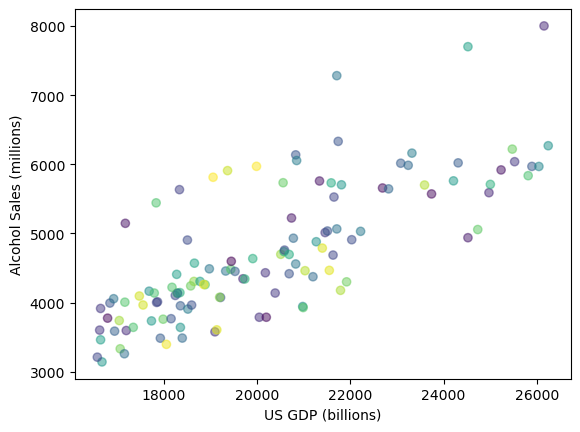

In [9]:
# Scatterplot between dependent variable and independent variables, respectively
colors = np.random.rand(len(df))
plt.scatter(df['US_GDP_Billions'], df['Alcohol_Sales_Millions'], c=colors, alpha=0.5)
plt.xlabel('US GDP (billions)')
plt.ylabel('Alcohol Sales (millions)')
plt.show()

In [10]:
# Defining correlation matrix
corr_matrix = df.corr()

In [11]:
# Regression 1: All variables 
# Define the predictor variables and the dependent variable for the regression
X = df[['US_GDP_Billions','CPI','Disposable_Personal_Income', 'US_Retail_Sales_Billions','Inflation_Rate', 'Unemployment_Rate','Home_Price_Index']]
y = df['Alcohol_Sales_Millions']

In [12]:
# Add a constant term to the predictor variables
X = sm.add_constant(X)

In [13]:
# Create a linear regression model
model = sm.OLS(y, X).fit()

In [14]:
import statsmodels.api as sm
import numpy as np

# this will print the standarized coeff
# Create a linear regression model
model = sm.OLS(y, X).fit()

# Obtain standardized coefficients
coef_std = model.params / model.bse

# Print the standardized coefficients
print(coef_std)

const                         1.086386
US_GDP_Billions               1.847622
CPI                          -1.534371
Disposable_Personal_Income   -1.507364
US_Retail_Sales_Billions     -0.081123
Inflation_Rate               -1.378635
Unemployment_Rate             2.549706
Home_Price_Index              1.684367
dtype: float64


In [15]:
#This code will convert realtive contributions to a weight
# Create a linear regression model
model = sm.OLS(y, X).fit()

# Obtain standardized coefficients
coef_std = model.params / model.bse

# Take the absolute value of each coefficient, excluding the constant term
coef_abs = abs(coef_std[1:])

# Sum the absolute values
coef_abs_sum = coef_abs.sum()

# Divide each coefficient by the sum of absolute values
coef_norm = coef_abs / coef_abs_sum

# Print the normalized coefficients
print(coef_norm)

US_GDP_Billions               0.174581
CPI                           0.144982
Disposable_Personal_Income    0.142430
US_Retail_Sales_Billions      0.007665
Inflation_Rate                0.130267
Unemployment_Rate             0.240920
Home_Price_Index              0.159155
dtype: float64


In [16]:
# Print the summary statistics for the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Alcohol_Sales_Millions   R-squared:                       0.679
Model:                                OLS   Adj. R-squared:                  0.659
Method:                     Least Squares   F-statistic:                     33.81
Date:                    Sat, 22 Apr 2023   Prob (F-statistic):           7.10e-25
Time:                            13:58:31   Log-Likelihood:                -927.41
No. Observations:                     120   AIC:                             1871.
Df Residuals:                         112   BIC:                             1893.
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [17]:
# Run the AutoReg Model
# Create training and test data
train_data = df['Alcohol_Sales_Millions'][:len(df)-102]
test_data = df['Alcohol_Sales_Millions'][len(df)-102:]

# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=8).fit()

# Print Summary
print(ar_model.summary())

                              AutoReg Model Results                               
Dep. Variable:     Alcohol_Sales_Millions   No. Observations:                   18
Model:                         AutoReg(8)   Log Likelihood                 -61.950
Method:                   Conditional MLE   S.D. of innovations            118.642
Date:                    Sat, 22 Apr 2023   AIC                            143.901
Time:                            13:58:31   BIC                            146.927
Sample:                                 8   HQIC                           140.582
                                       18                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.538e+04      1e+04     -5.535      0.000    -7.5e+04   -3.58e+04
Alcohol_Sales_Millions.L1     1.5548      0.254      6